# Importing

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.<b>Loading dataset<b/>

In [15]:
df = pd.read_csv(
    "AirQualityUCI.csv",
    sep=",",             # use comma instead of semicolon ✅
    na_values=-200,      
    engine="python",
    encoding="utf-8"
)

# Clean column names
df.columns = df.columns.str.strip()

# Drop empty columns
df = df.dropna(axis=1, how="all")

print(df.columns.tolist())



['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [16]:
print(df.columns.tolist())

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [17]:
with open("AirQualityUCI.csv", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())

﻿Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,,

3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,,

3/10/2004,19:00:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,,

3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,,

3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,,



# 2. <b> Cleaning Data <b/>

In [18]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df['DateTime'] = pd.to_datetime(
    df['Date'].astype(str) + ' ' + df['Time'].astype(str),
    errors='coerce'
)
df = df.dropna(subset=['DateTime'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  DateTime       9357 non-nu

In [19]:
print(df.columns.tolist())

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'DateTime']


# 3.<b>Exploratory Data Analysis(EDA)<b/>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


<b>Distribution<b/>

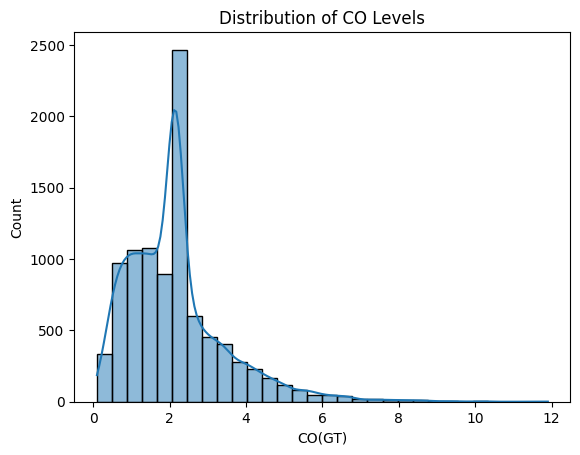

In [21]:
sns.histplot(df["CO(GT)"], bins=30, kde=True)
plt.title("Distribution of CO Levels")
plt.show()

<b>Correlation<b/>

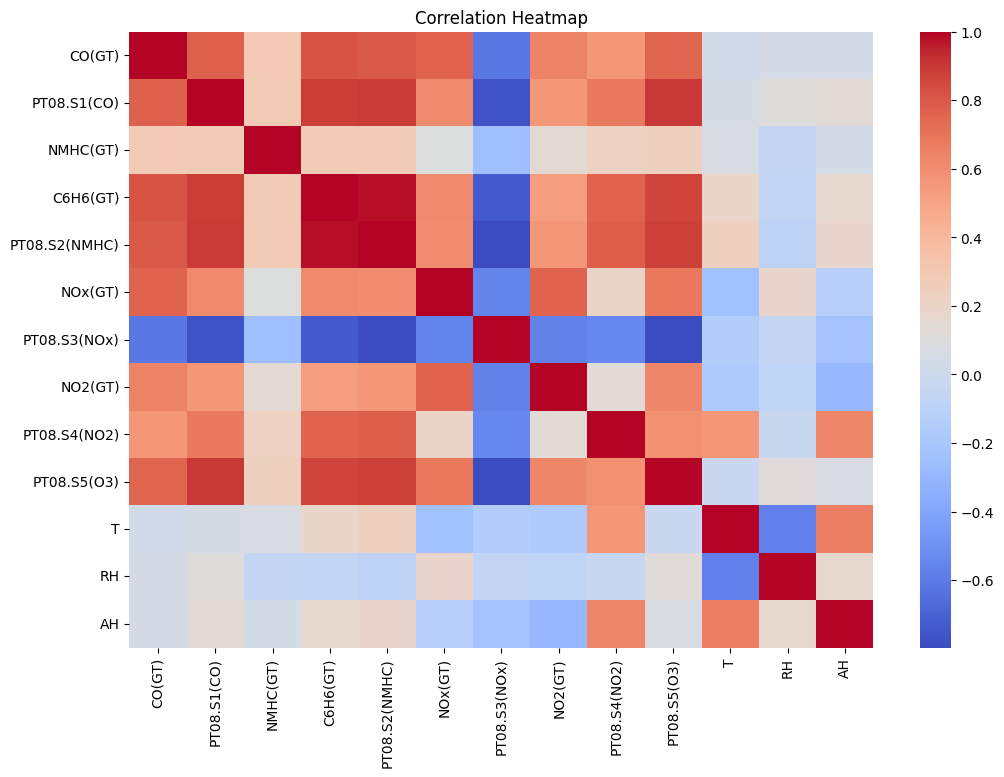

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# 5.<b>Simple Prediction Model<b/>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[["T", "RH", "AH"]] 
y = df["CO(GT)"]            
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model R² Score:", model.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Model R² Score: 0.011461018843738846
Mean Squared Error: 1.835285385058284


## Day2

<b>Update of Visualization of Prediction<b/>

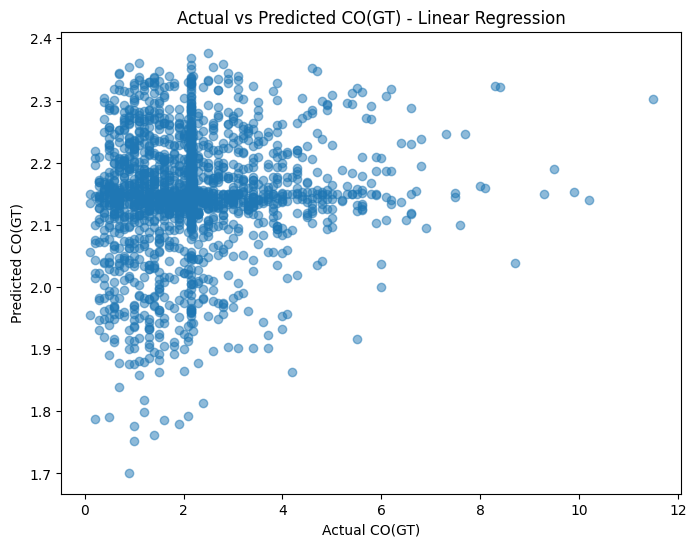

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs Predicted CO(GT) - Linear Regression")
plt.show()


## Day 4 
Data Visualization

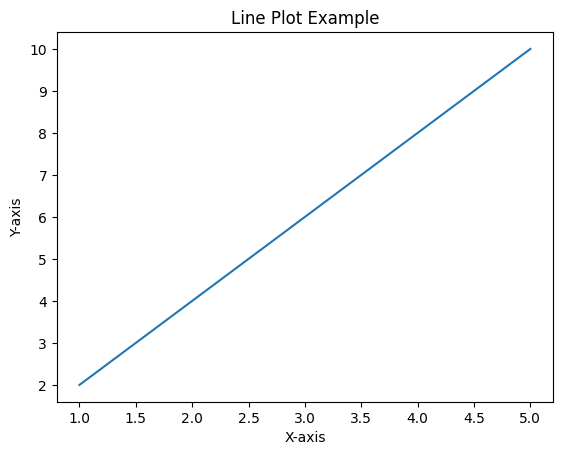

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [2,4,6,8,10]

plt.plot(x, y)
plt.title("Line Plot Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
